In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 42.7MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',learning_rate="0.001",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 105ms/step - loss: 1.4145 - accuracy: 0.5928 - val_loss: 0.6294 - val_accuracy: 0.6516
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6235 - accuracy: 0.6747 - val_loss: 0.6710 - val_accuracy: 0.6104
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5499 - accuracy: 0.7272 - val_loss: 0.4811 - val_accuracy: 0.7604
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4401 - accuracy: 0.7951 - val_loss: 0.4907 - val_accuracy: 0.7654
Epoch 5/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3830 - accuracy: 0.8269 - val_loss: 0.5831 - val_accuracy: 0.7562
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3185 - accuracy: 0.8600 - val_loss: 0.8666 - val_accuracy: 0.7322
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2457 - accuracy: 0.8951 - val_loss: 0.5539 - val_ac

In [ ]:
model.save("/content/drive/MyDrive/INTERNSHIP /catvsdog.h5")

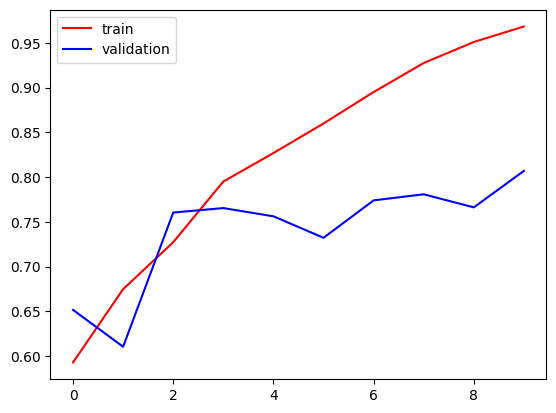

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

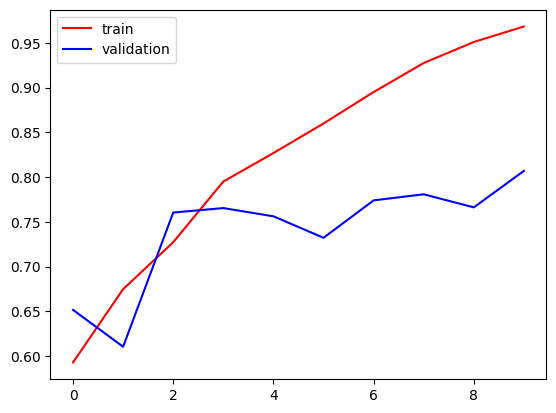

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

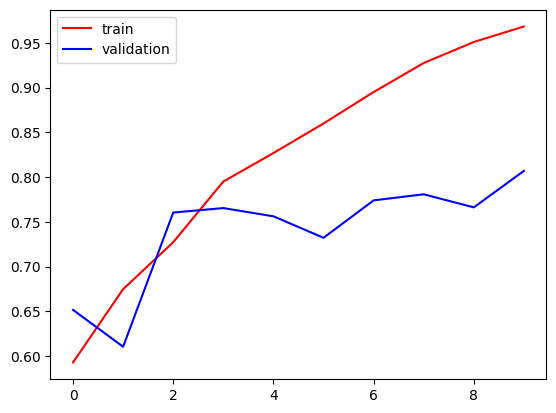

In [ ]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

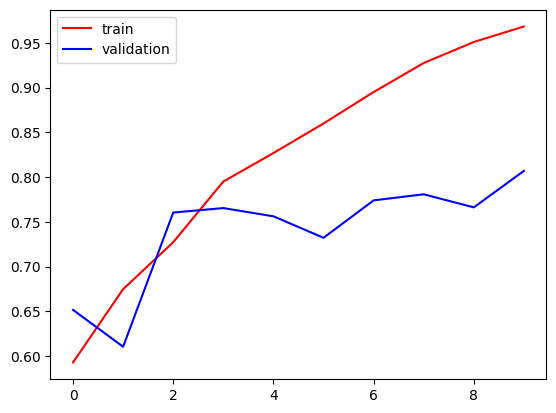

In [ ]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/INTERNSHIP /catvsdog.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/images/cat.jpg')

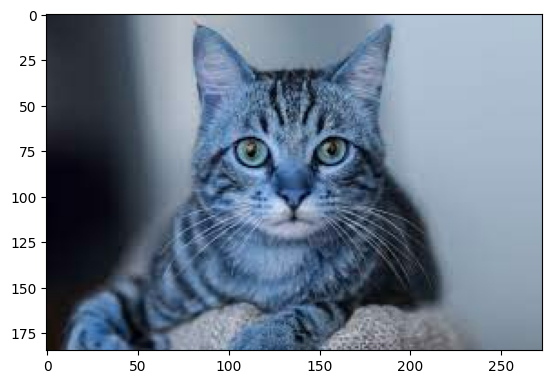

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(185, 273, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 259ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img2 = cv2.imread('/content/drive/MyDrive/images/dog2.jpg')

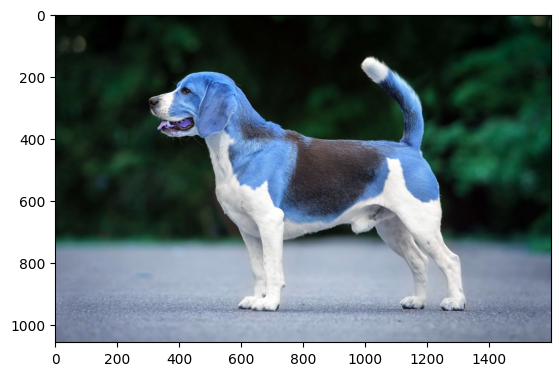

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(1057, 1600, 3)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input2 = test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input2)

1/1 [==============================] - 0s 177ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img3 = cv2.imread('/content/drive/MyDrive/images/catt.jpg')

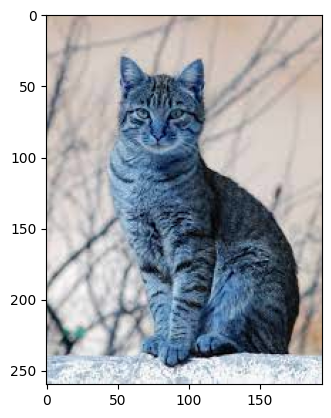

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(test_img3)

In [ ]:
test_img3.shape

(260, 194, 3)

In [ ]:
test_img3 = cv2.resize(test_img3,(256,256))

In [ ]:
test_input3 = test_img3.reshape((1,256,256,3))

In [ ]:
model.predict(test_input3)

1/1 [==============================] - 8s 8s/step


array([[0.00433807]], dtype=float32)

In [ ]:
test_img4 = cv2.imread('/content/drive/MyDrive/images/testdog.jpg')

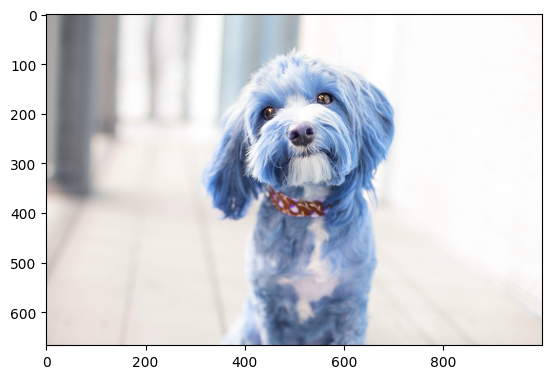

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(test_img4)

In [ ]:
test_img4.shape

(667, 1000, 3)

In [ ]:
test_img4 = cv2.resize(test_img4,(256,256))

In [ ]:
test_input4 = test_img4.reshape((1,256,256,3))

In [ ]:
model.predict(test_input4)

1/1 [==============================] - 0s 33ms/step


array([[1.]], dtype=float32)